In [11]:
import cv2

# Specify the video file or camera index (0 for default camera)
video_capture = cv2.VideoCapture('vid2.mp4')

# Initialize previous_frame outside the loop
previous_frame = None
x = 0
while True:
    # Read a frame from the video
    ret, frame = video_capture.read()

    # Break the loop if the video has ended
    if not ret:
        break

    # Display the frame
    cv2.imshow('Video', frame)

    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    # Example: Detect blinking based on changes in intensity
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Check if previous_frame is None (first iteration)
    if previous_frame is not None:
        # Compute the absolute difference between the current frame and the previous frame
        frame_diff = cv2.absdiff(previous_frame, gray_frame)

        # Threshold the difference to identify significant changes
        _, threshold_diff = cv2.threshold(frame_diff, 30, 255, cv2.THRESH_BINARY)

        # Count the number of non-zero pixels in the thresholded difference
        pixel_count = cv2.countNonZero(threshold_diff)

        # If the pixel count exceeds a certain threshold, consider it a blink
        if pixel_count > 100:
            print("Blink detected!")
            x += 1
            
            # Draw a rectangle on the frame to indicate the blink
            cv2.rectangle(frame, (0, 0), (frame.shape[1], frame.shape[0]), (0, 0, 255), 2)

    # Update the previous frame
    previous_frame = gray_frame

# Release the video capture object
video_capture.release()

# Close all windows
cv2.destroyAllWindows()
print(x)


Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink detected!
Blink de

In [ ]:
import cv2

def detect_blinking_light(video_path):
    """
    This function uses a video file to detect a blinking light and decodes it into a bit stream.
    
    Args:
    video_path (str): The path to the video file.
    
    Returns:
    str: The decoded bit stream
    """
    try:
        # Open the video file
        cap = cv2.VideoCapture(video_path)
        
        # Initialize variables
        bit_stream = ""
        prev_light_state = False
        
        while True:
            # Read frame from the video
            ret, frame = cap.read()
            
            # If the video has ended, exit the loop
            if not ret:
                break
            
            # Convert the frame to grayscale
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            
            # Apply thresholding to detect the blinking light
            _, threshold = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
            
            # Find contours in the thresholded image
            contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            
            # Check if a blinking light is detected
            light_detected = len(contours) > 0
            
            # If the light state has changed, update the bit stream
            if light_detected != prev_light_state:
                bit_stream += "1" if light_detected else "0"
                prev_light_state = light_detected
            
            # Display the frame with blinking light detection
            cv2.imshow("Blinking Light Detection", frame)
            
            # Exit the loop if 'q' is pressed
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        
        # Release the video capture and close the window
        cap.release()
        cv2.destroyAllWindows()
        
        return bit_stream
    
    except Exception as e:
        # Log the error
        print(f"Error: {e}")
        return ""

# Example usage with a video file named "example_video.mp4"
bit_stream = detect_blinking_light("vid.mp4")
print(f"Decoded Bit Stream: {bit_stream}")


Decoded Bit Stream: 1


In [8]:
import cv2

# Load pre-trained model (replace this with your actual model)
# Here, we use a simple contour detection as an example
counter = 0
def detect_led(frame):
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and improve contour detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use contour detection to find LED regions
    _, thresh = cv2.threshold(blurred, 50, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contours (LEDs) are found
    return len(contours) > 0

# Simulate capturing video from the Raspberry Pi camera (replace this with actual camera code)
def capture_video():
    # In a real-world scenario, capture video from the Raspberry Pi camera
    # For simulation purposes, read a video from file
    return cv2.VideoCapture('vid.mp4')

# Main loop for continuous monitoring
video_capture = capture_video()

while True:
    # Read a frame from the video stream
    _, frame = video_capture.read()

    # Check if the video has ended
    if frame is None:
        break

    # Detect LEDs in the captured frame
    #if detect_led(frame):
    #    # Trigger alarm (replace this with your actual alarm mechanism)
    #    print("LED interruption detected! Triggering alarm.")
    counter += 1

    # Add any necessary delay or loop control logic

# Release the video capture object when done
video_capture.release()
print(counter)

338


In [6]:
import cv2
import os

# Function to label frames manually
def label_frames(video_path, output_folder):
    cap = cv2.VideoCapture(video_path)

    video_name = video_path.split('/')[-1]

    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    current_frame = 0

    while True:
        ret, frame = cap.read()

        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break

        # Display the frame and get user input
        cv2.imshow("Frame", frame)
        key = cv2.waitKey(0) & 0xFF

        # amount of lights turned on
        if key == ord('0'):
            label = '0'
        elif key == ord('1'):
            label = '1'
        elif key == ord('2'):
            label = '2'
        elif key == ord('3'):
            label = '3'
        elif key == ord('4'):
            label = '4'
        elif key == ord('q'):
            break
        else:
            label = 'skip'

        # Save the labeled frame
        frame_filename = os.path.join(output_folder, f"{video_name}_{current_frame:05d}_{label}.jpg")
        cv2.imwrite(frame_filename, frame)

        current_frame += 1

        # Break the loop if all frames are labeled
        if current_frame == frame_count:
            break

    cap.release()
    cv2.destroyAllWindows()

# Example usage
video_path = './vidscapstone/vid8.mp4'
output_folder = 'labeled_frames'

label_frames(video_path, output_folder)

In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
from glob import glob
import cv2
import numpy as np
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta, Adamax, Nadam, Ftrl

# Load labeled frames and their corresponding labels
def load_labeled_frames(data_folder):
    images = []
    labels = []

    label_2_count = 0
    label_4_count = 0

    for image_path in glob(os.path.join(data_folder, '*.jpg')):
        image = cv2.imread(image_path)
        image = cv2.resize(image, (100, 100))  # Resize the image to 100x100 pixels

        label = os.path.splitext(os.path.basename(image_path))[0].split('_')[-1]


        if (label_4_count < 30 or label != '4') and (label_2_count < 30 or label != '2'):
            images.append(image)

        if label == '0':
            labels.append(0)
        elif label == '1':
            labels.append(1)
        elif label == '2':
            if label_2_count < 30:
                labels.append(2)
                label_2_count += 1
        elif label == '3':
            labels.append(3)
        elif label == '4':
            if label_4_count < 30:
                labels.append(4)
                label_4_count += 1

    return images, labels

# Preprocess the data
def preprocess_data(images, labels):
    images = np.array(images)
    labels = np.array(labels)

    # Normalize pixel values to be between 0 and 1
    images = images / 255.0

    # Shuffle and split the data into training and testing sets
    images, labels = shuffle(images, labels, random_state=46)
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=44)

    return X_train, X_test, y_train, y_test

# Example usage
output_folder = 'labeled_frames'

# Load labeled frames and their corresponding labels
images, labels = load_labeled_frames(output_folder)

# Preprocess the data
X_train, X_test, y_train, y_test = preprocess_data(images, labels)

input_shape = X_train[0].shape



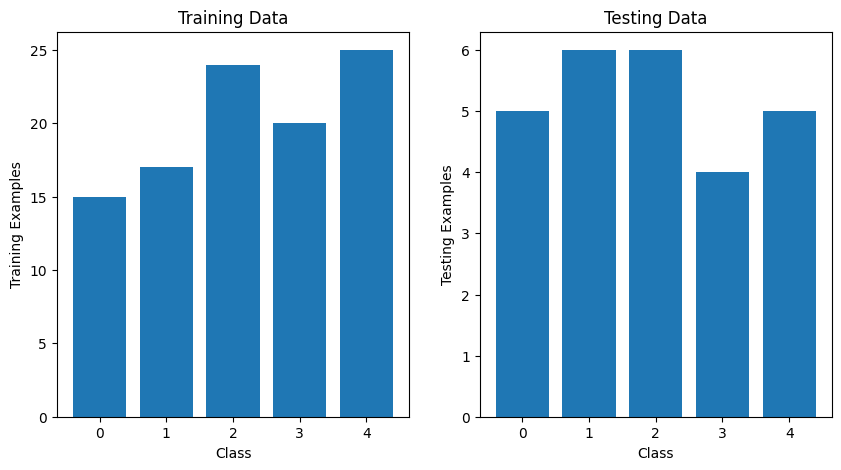

In [33]:
# Bar plots of the number of training and testing examples for each class
import matplotlib.pyplot as plt
import numpy as np

# Count the number of training and testing examples for each class
train_counts = np.bincount(y_train)
test_counts = np.bincount(y_test)

# Plot bar plots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(np.arange(5), train_counts)
plt.xticks(np.arange(5))
plt.xlabel('Class')
plt.ylabel('Training Examples')
plt.title('Training Data')

plt.subplot(1, 2, 2)
plt.bar(np.arange(5), test_counts)
plt.xticks(np.arange(5))
plt.xlabel('Class')
plt.ylabel('Testing Examples')
plt.title('Testing Data')

plt.show()

In [32]:
# # Define the CNN model
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = input_shape))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid')) 

# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 'AUC', 'MeanSquaredError'])


# # Train the model
# history = model.fit(
#     X_train,
#     y_train,
#     epochs=25,
#     validation_data=(X_test, y_test),
# )


In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
from glob import glob
import cv2
import numpy as np
from tensorflow.keras.optimizers import Adam

# Example usage
output_folder = 'labeled_frames'

# Load labeled frames and their corresponding labels
images, labels = load_labeled_frames(output_folder)

# Preprocess the data
X_train, X_test, y_train, y_test = preprocess_data(images, labels)

input_shape = X_train[0].shape

# Convert labels to one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=5)

# Build the model
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(5, activation='softmax')) 

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',  # Use categorical crossentropy for multiclass classification
              metrics=['accuracy', 'AUC', 'MeanSquaredError'])

# Train the model
history = model.fit(X_train, y_train_one_hot, epochs=10, validation_data=(X_test, y_test_one_hot))


Epoch 1/10
1/4 [======>.......................] - ETA: 4s - loss: 1.6072 - accuracy: 0.2188 - auc: 0.5352 - mean_squared_error: 0.1598

In [35]:

model.save('multiclass_classification_model_Adam.h5')

#save history
import pickle
with open('multiclass_classification_model_Adam_history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

C:\Users\diren\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
# plot the loss and accuracy
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.models import load_model

with open('multiclass_classification_model_Adam_history', 'rb') as file_pi:
    history = pickle.load(file_pi)

model = load_model('multiclass_classification_model_Adam.h5')


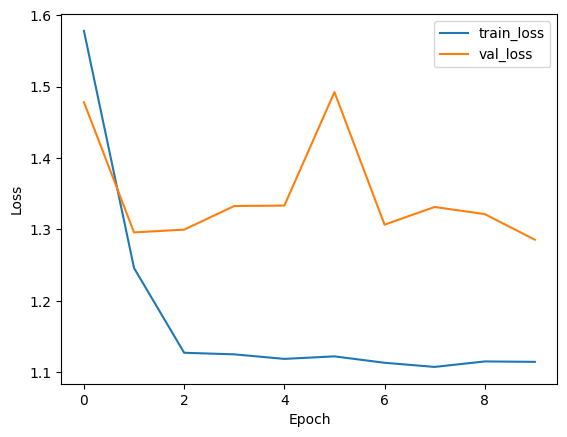

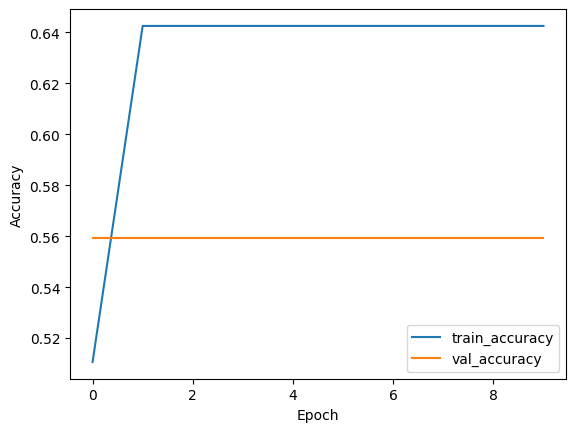

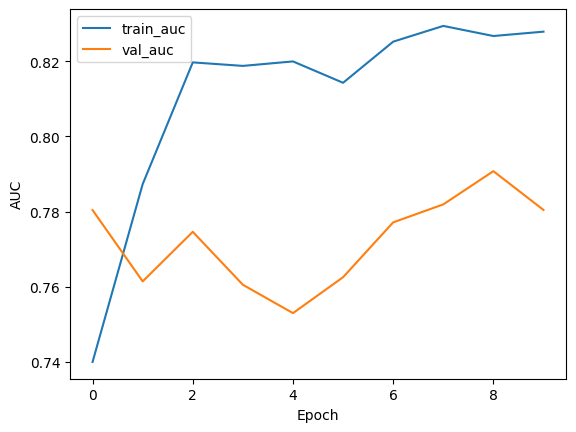

NameError: name 'X_test' is not defined

In [4]:

plt.plot(history['loss'], label='train_loss')
plt.plot(history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history['accuracy'], label='train_accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# plot the AUC
plt.plot(history['auc'], label='train_auc')
plt.plot(history['val_auc'], label='val_auc')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy, auc, mse = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print(f"MSE: {mse:.4f}")


In [27]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index=[i for i in range(5)], columns=[i for i in range(5)])

print("Predicted")
print(df_cm)


1/1 [==============================] - 0s 183ms/step
Predicted
     0         1    2         3         4
0  1.0  0.000000  0.0  0.000000  0.000000
1  0.0  0.857143  0.0  0.000000  0.142857
2  0.0  0.000000  1.0  0.000000  0.000000
3  0.0  0.000000  0.0  1.000000  0.000000
4  0.0  0.142857  0.0  0.142857  0.714286
